In [245]:
import numpy as np
import scipy.integrate as spInt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import signal
%matplotlib inline


# Model definition
kbRatio = 100
y0 = [0] # Initial amount of force
timeStart = 0 # second
timeEnd = 1 # second
steps = 10000 # Sampling Frequency
timeToSolve = (timeStart, timeEnd)

# Contraction Element (actuator) parameters
maxForce = 1 #N?
totalWaveTime = 20 # milliseconds
activationTime = 10 # In milliseconds

In [246]:
squareWaveFrequency = (1/(totalWaveTime/1000)) # Hz
dutyCycle = (activationTime / totalWaveTime) # Out of 1.0

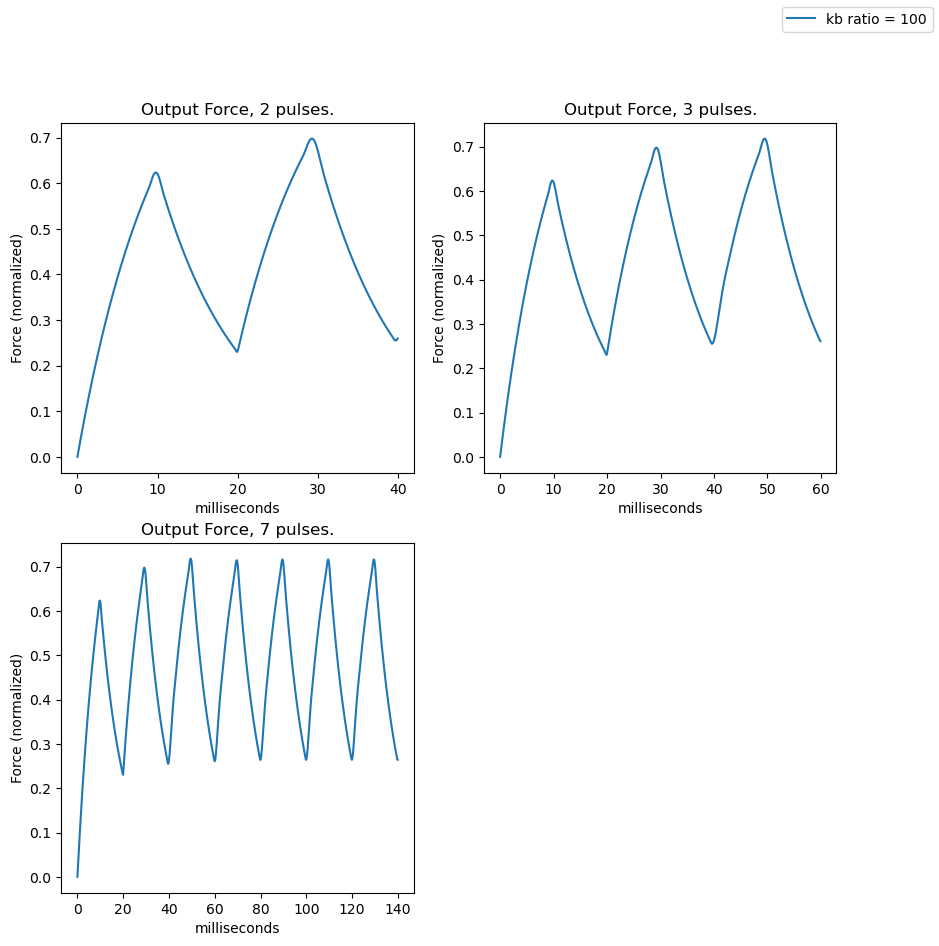

In [255]:
timeArray = np.linspace(timeToSolve[0],timeToSolve[1],steps, dtype=np.float64)
timeArrayPlot = np.linspace(timeToSolve[0], timeToSolve[1] * 1000, steps, dtype=np.float64)
stimForce = signal.square(2*np.pi*(squareWaveFrequency)*timeArray,dutyCycle)

stimForce[stimForce==-1] = 0
stimForce = stimForce*maxForce
odeArgs = (kbRatio, stimForce,timeArray)
y = spInt.solve_ivp(muscleModelODE, t_span=timeToSolve, t_eval=timeArray, y0=y0, args=odeArgs)
f, ax = plt.subplots(nrows=2, ncols=2)
# Plot the first 2 pulses
ax[0,0].plot(timeArrayPlot[0:totalWaveTime*20], y.y[0][0:totalWaveTime*20])
# Plot 3 pulses
ax[0,1].plot(timeArrayPlot[0:totalWaveTime*30], y.y[0][0:totalWaveTime*30])
# Plot 7 pulses
ax[1,0].plot(timeArrayPlot[0:totalWaveTime*70], y.y[0][0:totalWaveTime*70])
f.set_size_inches(10,10)
ax[0,0].set_title("Output Force, 2 pulses.")
ax[0,0].set_xlabel("milliseconds")
ax[0,0].set_ylabel("Force (normalized)")
ax[0,1].set_title("Output Force, 3 pulses.")
ax[0,1].set_ylabel("Force (normalized)")
ax[0,1].set_xlabel("milliseconds")
ax[1,0].set_title("Output Force, 7 pulses.")
ax[1,0].set_ylabel("Force (normalized)")
ax[1,0].set_xlabel("milliseconds")
ax[1,1].axis('off')
f.legend(["kb ratio = " + str(kbRatio)])

In [248]:
#solve_ivp functions must be in the form func(t, y)
def muscleModelODE(t, y, kbRatio, drivingForce, timeArray):
    # fill in the gap
    diffArray = np.absolute(timeArray-t)
    idx = diffArray.argmin()
    dydt = [((kbRatio)*(drivingForce[idx] - y))]
    return dydt